In [17]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
matplotlib.rcParams['axes.facecolor'] = 'white' # Or any suitable colour...
sns.set_style("dark")


In [3]:
def TrainValTest(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train_val, X_test, y_train_val, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=3)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [4]:
with open('data/project_2_basecase.pkl', 'rb') as picklefile:
    df_base = pickle.load(picklefile)

In [5]:
df_base['genre'] = df_base.genre.apply(lambda x: ''.join(x.split(',')[:2]))
genrecounts = df_base.genre.value_counts()
othergenres = list(genrecounts[genrecounts<=60].index)
df_base['genre'] = df_base['genre'].replace(othergenres, 'Other')
df_base.drop('style', axis=1, inplace=True)
df_base=pd.get_dummies(df_base)

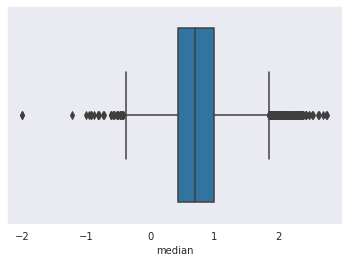

In [18]:
sns.boxplot(np.log10(df_base['median']))

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = \
TrainValTest(df_base.drop('median',axis=1), df_base['median'])

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Training score: ",lm.score(X_train, y_train),"\nValidation Score: ",lm.score(X_val,y_val))

Training score:  0.939467323869293 
Validation Score:  0.9036869766117189


Text(0.5, 1.0, 'Naive Regression')

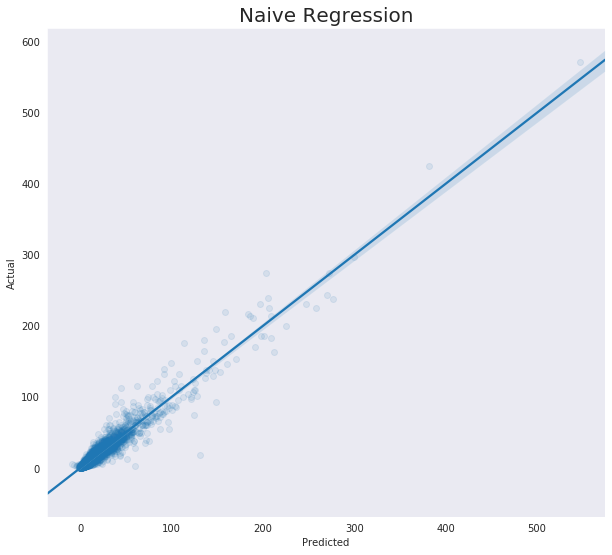

In [20]:
naive_pred = lm.predict(X_train)
fig, ax = plt.subplots(figsize=(10,9))
sns.regplot(naive_pred,y_train, scatter_kws={'alpha':0.1})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Naive Regression', fontsize=20, fontweight=5)

Wow that's high! I wonder why?

In [8]:
sorted(list(zip(lm.coef_, X_train.columns)), reverse=True)

[(0.9250883232352561, 'lowest'),
 (0.6022930423721885, 'genre_Electronic Hip Hop'),
 (0.5340347082565168, 'genre_Other'),
 (0.527325656414518, 'format_CDr'),
 (0.47126390093642034, 'genre_Electronic Reggae'),
 (0.37460631859308363, 'country_Canada'),
 (0.35930792869497197, 'genre_Electronic Rock'),
 (0.3570586407594417, 'genre_Reggae'),
 (0.3460367374442034, 'format_CD'),
 (0.3459092123211889, 'country_Sweden'),
 (0.2818880467696525, 'genre_Hip Hop Funk / Soul'),
 (0.27168759959702565, 'rating'),
 (0.26634159488522774, 'country_Europe'),
 (0.2662045070131954, 'comment_num'),
 (0.26157993507431754, 'genre_Jazz'),
 (0.25928554330301073, 'country_Belgium'),
 (0.25522402958824897, 'format_Vinyl'),
 (0.2243900757833744, 'country_UK & Europe'),
 (0.20466208556596843, 'highest'),
 (0.18342298148731112, 'genre_Rock'),
 (0.15686086261320814, 'genre_Jazz Funk / Soul'),
 (0.14449490603448045, 'country_Italy'),
 (0.10632169278032938, 'genre_Hip Hop'),
 (0.04962539366643635, 'country_France'),
 (0.

In [55]:
lm2= LinearRegression()
lm2.fit(X_train.drop(['highest','lowest'],axis=1), y_train)
print("Training score: ",lm2.score(X_train.drop(['highest','lowest'], axis=1), y_train),"\nValidation Score: ",lm2.score(X_val.drop(['highest','lowest'], axis=1),y_val))

Training score:  0.5107146837538736 
Validation Score:  0.6303993246414166


In [56]:
cross_val_score(lm2, df_base.drop(['median', 'highest','lowest'],axis=1),df_base['median'], cv=5, scoring = 'r2')

array([0.45151665, 0.47897333, 0.48348061, 0.46494907, 0.58771434])

#### maybe the outliers are making this too hard

In [57]:
df2=df_base[(df_base['median']<100)&(df_base['median']>0.15)]

In [58]:
X2_train, X2_val, X2_test, y2_train, y2_val, y2_test = \
TrainValTest(df2.drop('median',axis=1), df2['median'])

In [59]:
lm2= LinearRegression()
lm2.fit(X2_train.drop(['highest','lowest'],axis=1), y2_train)
print("Training score: ",lm2.score(X2_train.drop(['highest','lowest'], axis=1), y2_train),"\nValidation Score: ",lm2.score(X2_val.drop(['highest','lowest'], axis=1),y2_val))

Training score:  0.5305519685197755 
Validation Score:  0.550089634778371


In [60]:
np.mean(cross_val_score(lm2, df2.drop(['median', 'highest','lowest'],axis=1),df2['median'], cv=5, scoring = 'r2'))

0.5360520503316071

not bad...

In [61]:
sorted(list(zip(lm2.coef_, X2_train.columns)), reverse=True)

[(3.3683338708000976, 'country_Germany'),
 (3.2991702213514, 'country_Spain'),
 (2.8353747745512057, 'format_CDr'),
 (2.349851645788667, 'genre_Jazz'),
 (2.232635094278521, 'want_num'),
 (2.016864898334854, 'genre_Other'),
 (1.8050447295855365, 'num_for_sale'),
 (1.6582713331505798, 'country_UK & Europe'),
 (1.3551286056210639, 'genre_Hip Hop'),
 (1.3466457836134589, 'genre_Electronic Pop'),
 (0.878870663056347, 'genre_Pop'),
 (0.6967706952033692, 'country_Japan'),
 (0.6914327367592001, 'genre_Jazz Funk / Soul'),
 (0.6434512202797156, 'country_Canada'),
 (0.5485180805265334, 'country_Other'),
 (0.3841170899317728, 'genre_Reggae'),
 (0.3212499952324034, 'comment_num'),
 (0.31367707400514977, 'ask_price'),
 (0.2243642611044266, 'country_France'),
 (0.12796806570689423, 'last_sold'),
 (0.042761756494356526, 'genre_Electronic Jazz'),
 (0.03014978843190841, 'rating'),
 (-0.0004161953922590181, 'highest'),
 (-0.0008030084118506586, 'lowest'),
 (-0.004259214177104896, 'have_num'),
 (-0.054107

#### Can we get away with no information about price at all?

In [16]:
with open('data/project_2_styletags.pkl', 'rb') as picklefile:
    df_noprices = pickle.load(picklefile)

In [17]:
df_noprices.drop('genre',axis=1,inplace=True)

In [18]:
X3_train, X3_val, X3_test, y3_train, y3_val, y3_test = \
TrainValTest(df_noprices.drop('median',axis=1), df_noprices['median'])

In [19]:
lm3= LinearRegression()
lm3.fit(X3_train, y3_train)
print("Training score: ",lm3.score(X3_train, y3_train),"\nValidation Score: ",lm3.score(X3_val,y3_val))

Training score:  0.30523870356004734 
Validation Score:  0.3809636094265759


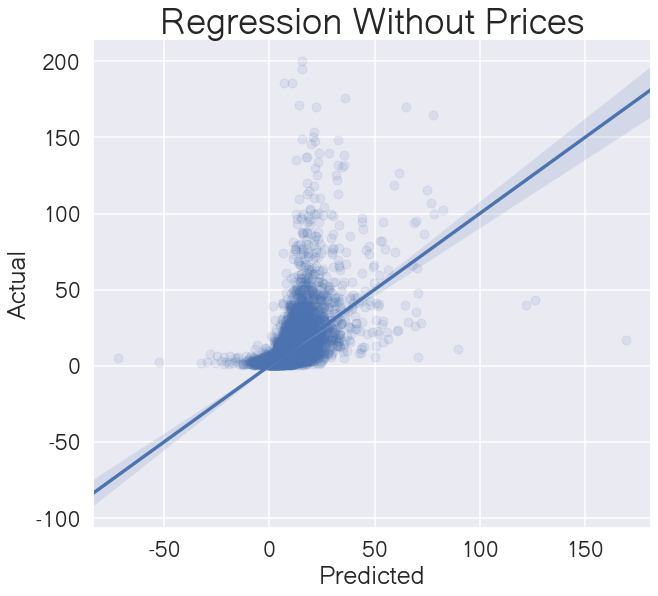

In [166]:
naive_pred = lm3.predict(X3_train)
fig, ax = plt.subplots(figsize=(10,9))
sns.regplot(naive_pred,y3_train, scatter_kws={'alpha':0.1})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Regression Without Prices', fontsize=36, fontweight=5)
fig.savefig('Regression_wo_prices')

In [20]:
np.mean(cross_val_score(lm3, df_noprices.drop('median',axis=1), df_noprices['median'], cv=5, scoring='r2'))

0.3190283688668808

In [97]:
sorted(list(zip(lm3.coef_, X3_train.columns)), reverse=True)

[(6.50604049983748, 'country_Japan'),
 (5.566602799374649, 'format_Other'),
 (2.8219022757800567, 'rating'),
 (2.58684684177399, 'country_Australia'),
 (2.1036578665569783, 'Gabber'),
 (2.0365935455559687, 'country_Switzerland'),
 (1.7411348190629157, 'Jungle'),
 (1.555517885268802, 'Non-Music'),
 (1.2938117598688326, 'format_CDr'),
 (1.1236633577123338, 'Experimental'),
 (1.1221210817482647, 'Classical'),
 (1.1131980705780673, 'Noise'),
 (0.9653424417462502, 'Acid'),
 (0.9042840204315883, 'Rock'),
 (0.8857815813515344, 'Psychedelic Rock'),
 (0.8842513308119886, 'New Wave'),
 (0.8753673939323026, 'country_Sweden'),
 (0.8437365496343954, 'Punk'),
 (0.8255677699993611, 'Italodance'),
 (0.7303113547363487, 'Synth-pop'),
 (0.7245786748733782, 'Jazz'),
 (0.7162413776637107, 'Blues'),
 (0.7062931404611906, 'Funk'),
 (0.6944458491165348, 'country_Other'),
 (0.6408239649838362, 'Brass & Military'),
 (0.5926882260690866, 'comment_num'),
 (0.5574304226685771, 'Industrial'),
 (0.5542587017037548,

### OK, let's see if we can do better!

In [101]:
df3 = df_noprices.copy()
df3['want_have_ratio'] = df3['want_num']/df2['have_num']
df3['want_have_ratio'].replace(np.inf, 0, inplace=True)
df3['want_have_ratio'].replace(np.nan, 0,inplace=True)

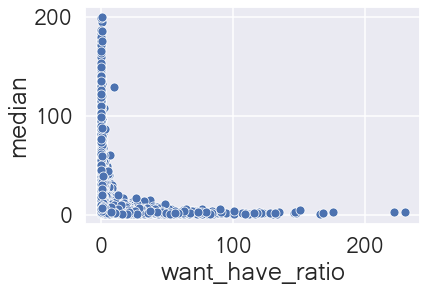

In [102]:
sns.scatterplot(df3['want_have_ratio'],df3['median'])

In [22]:
X4_train, X4_val, X4_test, y4_train, y4_val, y4_test = \
TrainValTest(df3.drop('median',axis=1), df3['median'])
df3.isna().any()

comment_num            False
have_num               False
last_sold              False
link_num               False
median                 False
num_for_sale           False
num_ratings            False
rating                 False
release_date           False
want_num               False
format_CD              False
format_CDr             False
format_Cassette        False
format_Other           False
format_Vinyl           False
country_Australia      False
country_Belgium        False
country_Canada         False
country_Europe         False
country_France         False
country_Germany        False
country_Italy          False
country_Japan          False
country_Netherlands    False
country_Other          False
country_Spain          False
country_Sweden         False
country_Switzerland    False
country_UK             False
country_UK & Europe    False
                       ...  
Hard Trance            False
Minimal                False
Abstract               False
Soul          

In [23]:
lm4= LinearRegression()
lm4.fit(X4_train, y4_train)
print("Training score: ",lm4.score(X4_train, y4_train),"\nValidation Score: ",lm4.score(X4_val,y4_val))

Training score:  0.31253710455137607 
Validation Score:  0.38955193723294196


In [24]:
np.mean(cross_val_score(lm4, df3.drop('median',axis=1), df3['median'], cv=5,scoring='r2'))

0.3237178729228665

In [25]:
sorted(list(zip(lm4.coef_, X4_train.columns)),reverse=True)

[(6.249352669194367, 'country_Japan'),
 (5.729868577905077, 'format_Other'),
 (2.6846949168795757, 'rating'),
 (2.6353817978445453, 'country_Australia'),
 (2.1198102152754945, 'Gabber'),
 (2.058977829071923, 'country_Switzerland'),
 (1.6658522553539, 'Jungle'),
 (1.4947359143438754, 'Non-Music'),
 (1.1784193760782784, 'Noise'),
 (1.1773521266100164, 'format_CDr'),
 (1.1430758769658473, 'Classical'),
 (1.0997926413231514, 'Experimental'),
 (0.9566634791772262, 'Rock'),
 (0.9072737322146509, 'country_Sweden'),
 (0.9007673236612226, 'New Wave'),
 (0.8894529291955988, 'Acid'),
 (0.8771945727829948, 'Psychedelic Rock'),
 (0.8505675293240912, 'Punk'),
 (0.7849203393822186, 'Italodance'),
 (0.7619979237372637, 'Synth-pop'),
 (0.7320837937748013, 'Blues'),
 (0.7224318027568315, 'country_Other'),
 (0.7156638967271136, 'Jazz'),
 (0.7135136619161302, 'Funk'),
 (0.6334721058474193, 'want_have_ratio'),
 (0.5975031277833085, 'comment_num'),
 (0.5870807562661019, 'Brass & Military'),
 (0.566883296509

In [122]:
df4=df3.copy()
df4['inv_for_sale'] = 1/df4['num_for_sale']
df4['inv_for_sale'].replace(np.inf, 2,inplace=True)

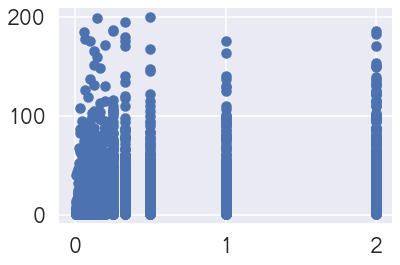

In [127]:
plt.scatter(df4['inv_for_sale'], df4['median'])

In [128]:
X5_train, X5_val, X5_test, y5_train, y5_val, y5_test = \
TrainValTest(df4.drop('median',axis=1), df4['median'])

In [129]:
lm5= LinearRegression()
lm5.fit(X5_train, y5_train)
print("Training score: ",lm5.score(X5_train, y5_train),"\nValidation Score: ",lm5.score(X5_val,y5_val))

Training score:  0.3389740272886138 
Validation Score:  0.4105549079878411


In [130]:
np.mean(cross_val_score(lm5, df4.drop('median',axis=1), df4['median'], cv=5,scoring='r2'))

0.3510371983339263

In [131]:
df5=df4.copy()
df5['inv_have_num'] = 1/df5['have_num']
df5['inv_have_num'].replace(np.inf, 0,inplace=True)

In [132]:
X6_train, X6_val, X6_test, y6_train, y6_val, y6_test = \
TrainValTest(df5.drop('median',axis=1), df5['median'])


In [133]:
lm6= LinearRegression()
lm6.fit(X6_train, y6_train)
print("Training score: ",lm6.score(X6_train, y6_train),"\nValidation Score: ",lm6.score(X6_val,y6_val))

Training score:  0.34040568301737983 
Validation Score:  0.4113967368267194


In [134]:
np.mean(cross_val_score(lm6, df5.drop('median',axis=1), df5['median'], cv=5,scoring='r2'))

0.35234584243736106

In [135]:
df6=df5.copy()
df6['rating_scaled'] = df6['rating']*df6['num_ratings']

X7_train, X7_val, X7_test, y7_train, y7_val, y7_test = \
TrainValTest(df6.drop('median',axis=1), df6['median'])

In [136]:
lm7= LinearRegression()
lm7.fit(X7_train, y7_train)
print("Training score: ",lm7.score(X7_train, y7_train),"\nValidation Score: ",lm7.score(X7_val,y7_val))

Training score:  0.34479003157333954 
Validation Score:  0.41158144573225636


In [137]:
np.mean(cross_val_score(lm7, df6.drop('median',axis=1), df6['median'], cv=5,scoring='r2'))

0.35540924385467987

In [138]:
df7=df6.copy()
df7['inv_rating_scaled'] = 1/(df7['rating']*df7['num_ratings'])
df7['inv_rating_scaled'].replace(np.inf, 0,inplace=True)

X8_train, X8_val, X8_test, y8_train, y8_val, y8_test = \
TrainValTest(df7.drop('median',axis=1), df7['median'])


In [139]:
lm8= LinearRegression()
lm8.fit(X8_train, y8_train)
print("Training score: ",lm8.score(X8_train, y8_train),"\nValidation Score: ",lm8.score(X8_val,y8_val))

Training score:  0.3448108276054158 
Validation Score:  0.41153423764638936


In [140]:
np.mean(cross_val_score(lm8, df7.drop('median',axis=1), df7['median'], cv=5,scoring='r2'))

0.35534850557246117

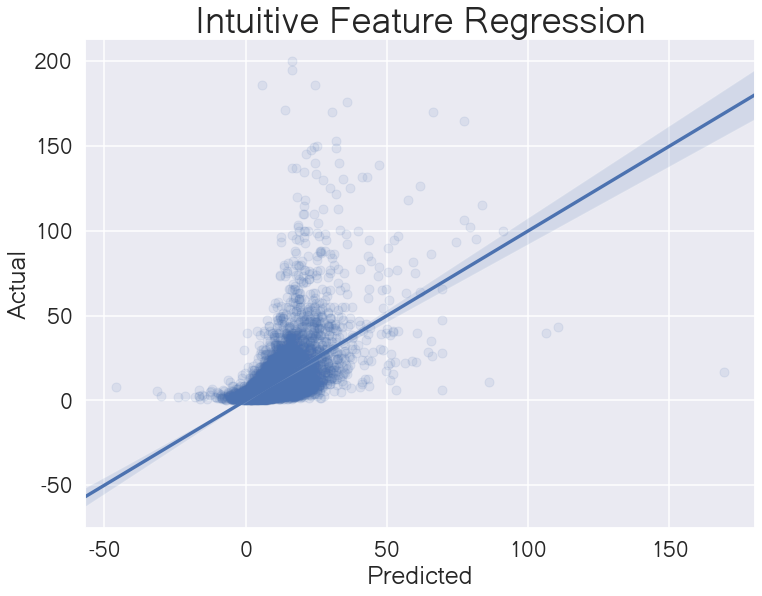

In [161]:
naive_pred = lm8.predict(X8_train)
fig, ax = plt.subplots(figsize=(12,9))
sns.regplot(naive_pred,y8_train, scatter_kws={'alpha':0.1})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Intuitive Feature Regression', fontsize=36, fontweight=5)
fig.savefig('Intuit Regression')

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


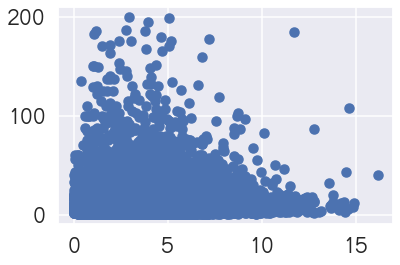

In [141]:
plt.scatter(np.log10(df7['want_num']*df7['want_have_ratio'])**2,df7['median'])

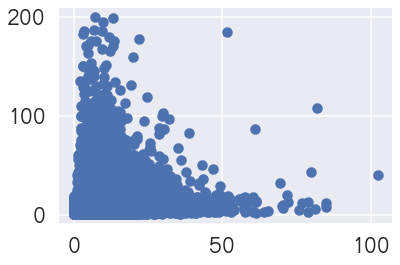

In [142]:
plt.scatter(np.sqrt(df7['want_num']*df7['want_have_ratio']),df7['median'])

In [143]:
df8=df7.copy()
df8['sqrt_rating_want'] = np.sqrt(df8['rating']*df8['want_num'])
df8['inv_rating_scaled'].replace(np.inf, 0,inplace=True)

X10_train, X10_val, X10_test, y10_train, y10_val, y10_test = \
TrainValTest(df8.drop('median',axis=1), df8['median'])


In [144]:
lm9 = LinearRegression()
lm9.fit(X10_train, y10_train)
print("Training score: ",lm9.score(X10_train, y10_train),\
      "\nValidation Score: ",lm9.score(X10_val,y10_val))

Training score:  0.3894748329947365 
Validation Score:  0.4421316079817075


In [145]:
np.mean(cross_val_score(lm9, df8.drop('median',axis=1), df8['median'], cv=5,scoring='r2'))

0.3943288245487924

In [146]:
df9=df8.copy()
df9['sqrt_wantsq/have'] = np.sqrt(df7['want_num']*df7['want_have_ratio'])

X11_train, X11_val, X11_test, y11_train, y11_val, y11_test = \
TrainValTest(df9.drop('median',axis=1), df9['median'])


In [147]:
lm10 = LinearRegression()
lm10.fit(X11_train, y11_train)
print("Training score: ",lm10.score(X11_train, y11_train),\
      "\nValidation Score: ",lm10.score(X11_val,y11_val))

Training score:  0.40773641954761186 
Validation Score:  0.4529513611563189


In [148]:
df10=df9.copy()
df10['sqrt_linknum_by_want/have'] = np.sqrt(df10['link_num']*df10['want_have_ratio'])

X12_train, X12_val, X12_test, y12_train, y12_val, y12_test = \
TrainValTest(df10.drop('median',axis=1), df10['median'])


In [149]:
lm11 = LinearRegression()
lm11.fit(X12_train, y12_train)
print("Training score: ",lm11.score(X12_train, y12_train),\
      "\nValidation Score: ",lm11.score(X12_val,y12_val))

Training score:  0.4086926106279123 
Validation Score:  0.4566100004979302


In [150]:
X_train_f, X_test_f, y_train_f, y_test_f =train_test_split(df10.drop('median',axis=1), df10['median'], test_size=0.2, random_state=42)

In [171]:
df_base.shape

(22383, 53)

In [151]:
lm11.fit(X_train_f, y_train_f)
print("Training score: ",lm11.score(X_train_f, y_train_f),\
      "\nValidation Score: ",lm11.score(X_test_f,y_test_f))

Training score:  0.42290935845303035 
Validation Score:  0.4150293522367271


In [152]:
y_hat = lm11.predict(X_test_f)

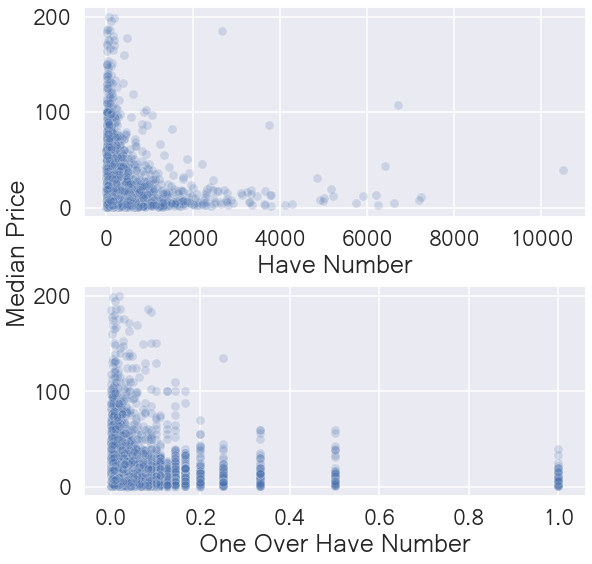

In [193]:
fig, axs = plt.subplots(2,1, figsize=(9,9))
axs[0] = sns.scatterplot(df7['have_num'],df7['median'], alpha = 0.2, ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_xlabel('Have Number')
axs[1] = sns.scatterplot(df7['inv_have_num'], df7['median'], alpha=0.2, ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_xlabel('One Over Have Number')
fig.subplots_adjust(hspace=.33)
fig.text(0.025, 0.5, 'Median Price', ha='center', va='center', rotation='vertical')
fig.savefig('feature_transform.png')

# Visualizations

In [153]:
import patsy
import scipy.stats as stats

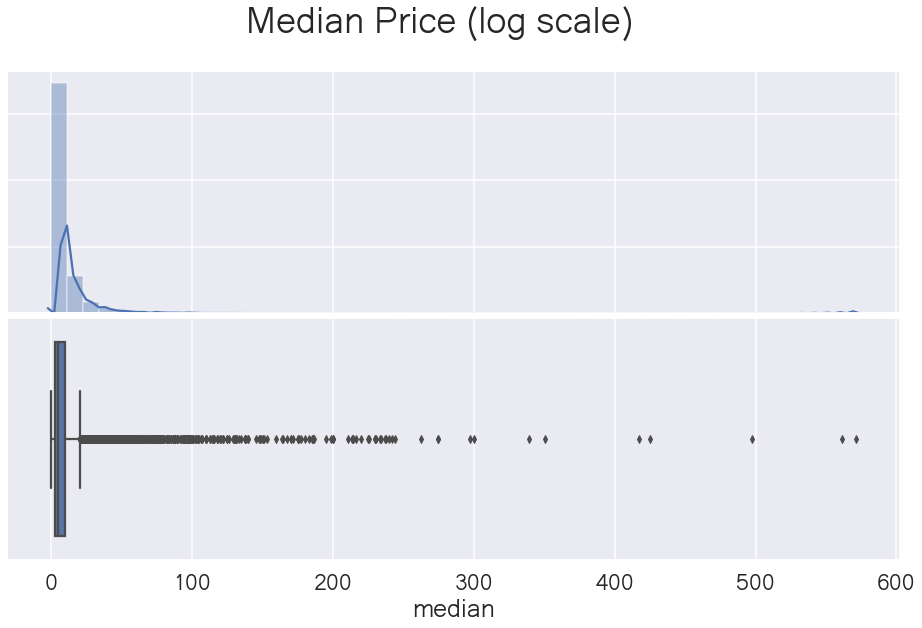

In [154]:
matplotlib.rcParams['font.sans-serif'] = "AnjaliOldLipi"
sns.set_context('talk', font_scale=1.4)
fig, ax =plt.subplots(2,1,'col', figsize = (16,9))
ax[0].tick_params('y', left=False, labelleft=False)
sns.distplot(df_base['median'], ax=ax[0], axlabel=False)
sns.boxplot(df_base['median'], ax=ax[1])
fig.subplots_adjust(wspace=.02, hspace=.02)
plt.suptitle("Median Price (log scale)", fontsize=36, fontweight=5);


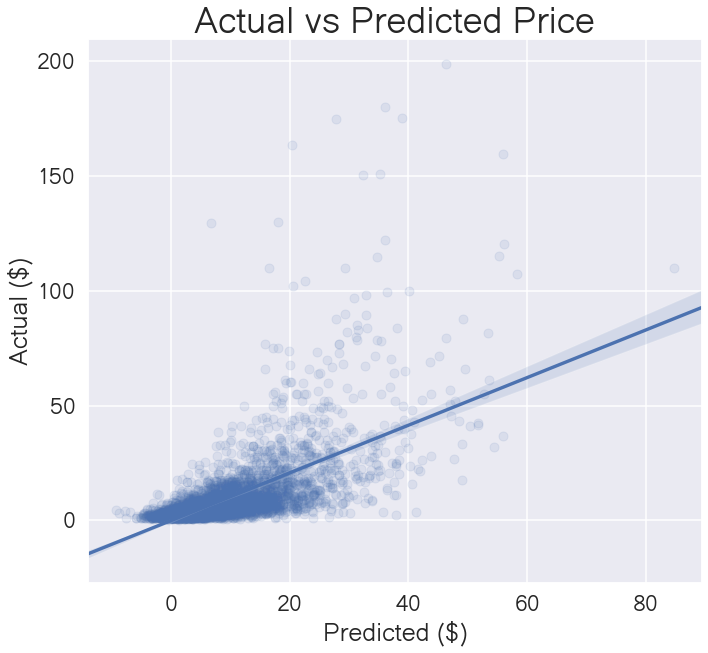

In [170]:
fig = plt.figure(figsize=(11,10))
sns.regplot(y_hat, y_test_f, scatter_kws={'alpha':0.1})
plt.ylabel('Actual ($)')
plt.xlabel('Predicted ($)')
plt.title('Actual vs Predicted Price',fontsize=36, fontweight=5)
plt.savefig('regplot_w_outliers_half.png')

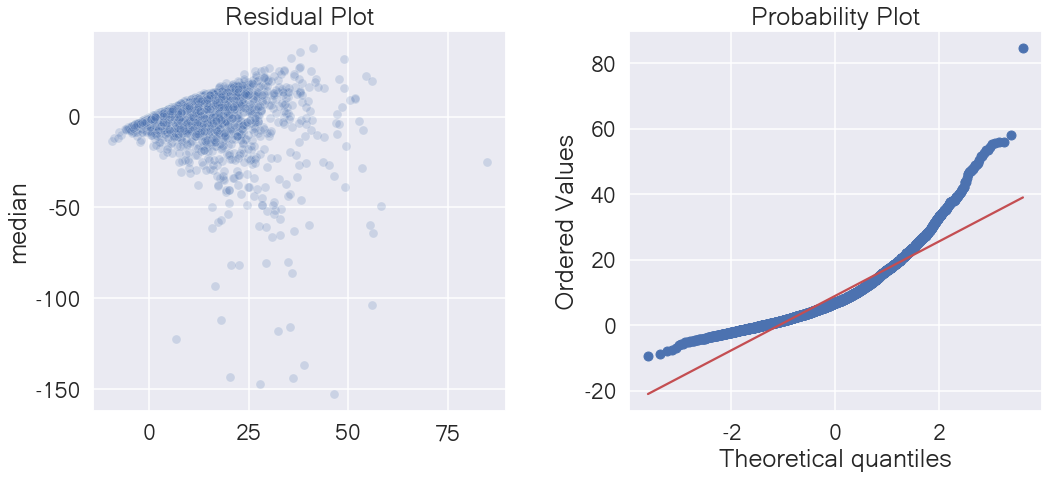

In [167]:
fig, axs = plt.subplots(1,2, figsize=(17,7))
sns.scatterplot(y_hat,(y_hat-y_test_f), ax=axs[0], alpha=0.2)
axs[0].set_title("Residual Plot")
plt.subplot(1,2,2)
stats.probplot(y_hat, dist="norm", plot=plt)
fig.subplots_adjust(wspace=.3)
fig.savefig('res_and_qq_w_outliers.png')
